## Read output

In [2]:
!conda install -c conda-forge -y country_converter

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.7.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/conda/envs/myenv

  added / updated specs:
    - country_converter


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    country_converter-1.0.0    |     pyhd8ed1ab_1          47 KB  conda-forge
    openssl-1.1.1w             |       hd590300_0         1.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.9 MB

The following NEW packages will be INSTALLED:

  country_converter  conda-forge/noarch::country_converter-1.0.0-pyhd8ed1ab_1

The following packages will be UPDATED:

  openssl                                 1.1.1v-hd590300_0 --> 1.1.1w-hd5

In [6]:
import sys  
sys.path.append("..")

import os
import pandas as pd
import matplotlib as mpl
from matplotlib import colors

import matplotlib.pyplot as plt
from bernSCM.run_bernSCM import *
import country_converter as coco

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib inline
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')


mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['font.size'] =30
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['legend.fontsize'] = 20 #30
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['xtick.major.pad']='8'
mpl.rcParams['ytick.major.pad']='8'

In [7]:
co2_diff = pd.DataFrame()
T_diff = pd.DataFrame()

for t in range(1979,2015):
    p_pulse = os.path.join('output','pulse_1yr_'+str(t)+'_D1I_BernSCM_t_f_CS30.dat')
    p_control = os.path.join('output','control_1yr_'+str(t)+'_D1I_BernSCM_t_f_CS30.dat')
    df_p = pd.read_csv(p_pulse, skiprows=131, delim_whitespace=True).set_index('#time')
    df_c = pd.read_csv(p_control, skiprows=131, delim_whitespace=True).set_index('#time')

    # calculate difference in atmospheric CO2[ppm]
    co2 = df_p.co2_atm- df_c.co2_atm
    co2.name = 'yr'+str(t)
    co2.index = co2.index.astype('int32')
    
    # calculate difference in global Temperature
    T = df_p.glob_temp_dev - df_c.glob_temp_dev
    T.name = 'yr'+str(t)

    co2_diff['yr_'+str(t)]=co2
    T_diff['yr_'+str(t)] = T

In [8]:
T_diff.to_csv('T_diff.csv',index_label='time')

### 1. Read CO2 data

In [9]:
co2 = pd.read_csv('../co2_data.csv', skiprows=37)
co2 = co2.drop(['unc'], axis=1)
co2['year'] = co2['year'].astype(str)

In [10]:
co2.loc[co2['year'] == str(2015), 'mean'].iloc[0]

399.65

In [11]:
co2

,year,mean
0,1979,336.85
1,1980,338.91
2,1981,340.11
3,1982,340.85
4,1983,342.53
5,1984,344.07
6,1985,345.54
7,1986,346.97
8,1987,348.68
9,1988,351.16


In [4]:
co2 = pd.read_csv('../CO2_data/01_03_co2data_with_code.csv', parse_dates=True, sep=',', header=0).set_index('Code')
co2.columns = co2.columns.astype(int)

# sum over all countries
co2_per_yr = co2.sum()

# convert to Gt CO2
co2_per_yr = co2_per_yr/1e9

# convert to Gt C !!!!
co2_per_yr = co2_per_yr/3.67

# get CO2 data per country and year as proportion of total emission 
co2_perc = co2.apply(lambda x: x/x.sum(), axis=0)
co2_perc.columns = 'yr_' + co2_perc.columns.astype(str)

### Plot accummulated global temperature change

#### 1. Create colormap
a) One/two colors with decadal shadding 

In [17]:
# choose colors (e.g. from coolors.co)
coolors_list= ["84b59f","50808e"]
coolors_list =["5D9193"]
# generates a list with those colors whit 10 variing alpha values
col = [colors.to_rgba('#'+c,i) for c in coolors_list for i in np.linspace(0.2,1,10)]
# repeat the list for each decade and the 4 years left
col = col*(int((16/len(coolors_list))))+col[:5]
# make a proper Colormap out of it
alternating_cmap=colors.ListedColormap(col)

b) one color for each century with decadal shadding

In [13]:
# each century own color, shading for decadals
l = []
for c in [["9E2A2B",5],["BF6535",10],["E09F3E",2]]:
    l = l+ [(colors.to_rgba('#'+c[0],i)) for i in np.linspace(0.2,1,10)]*c[1]
# remove last 5 years
l = l[:-5]

century_cmap=colors.ListedColormap(l)

In [15]:
%%bash
mkdir plots

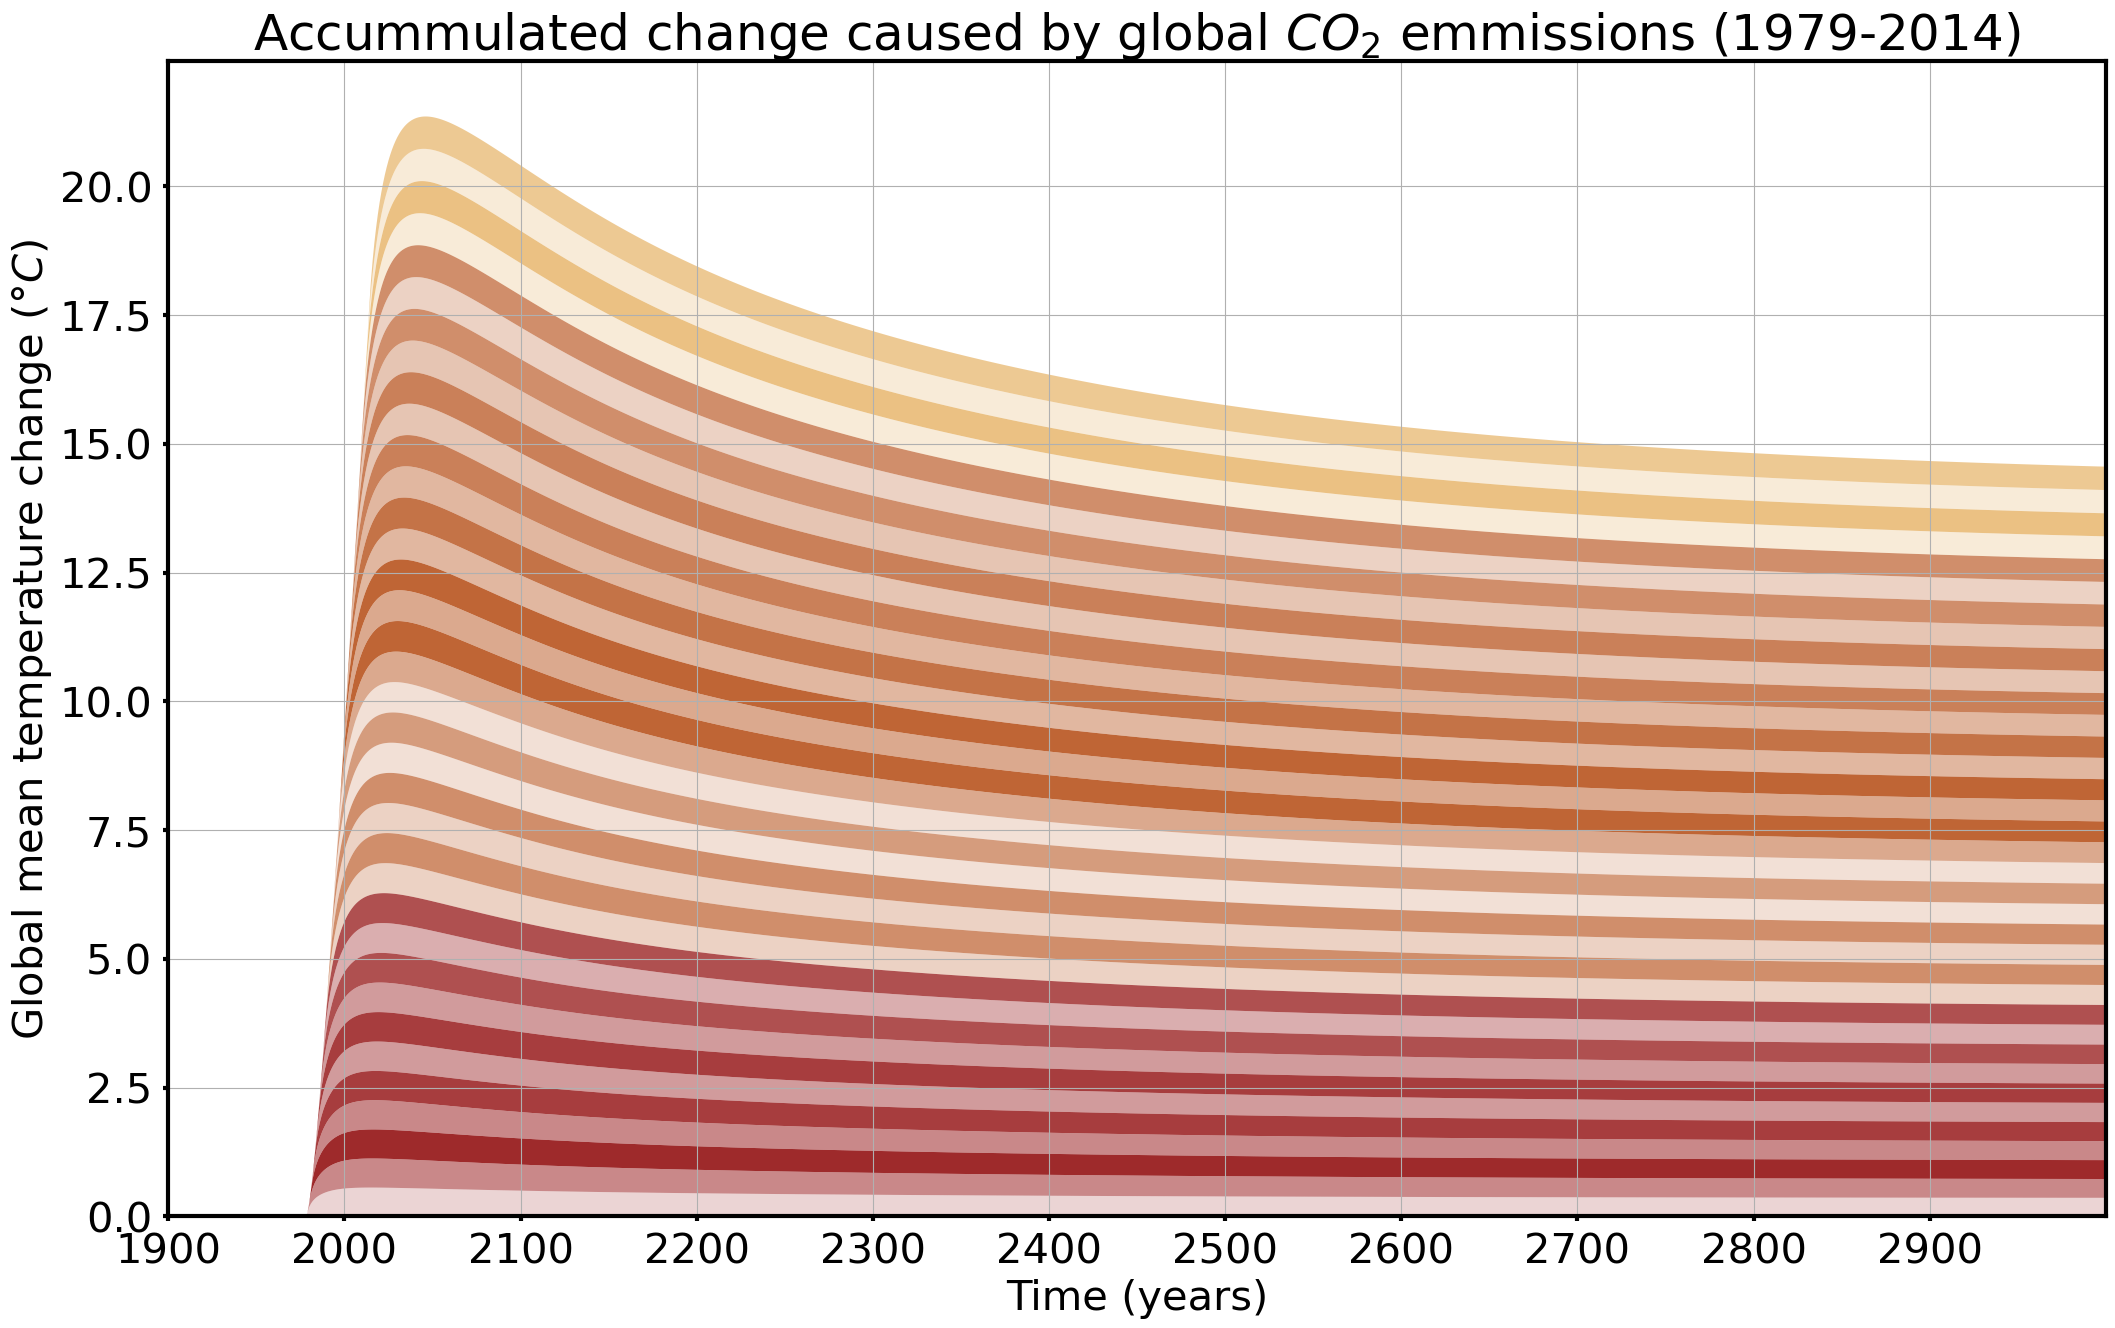

In [18]:
f, ax1 = plt.subplots(1,1,figsize=(25,15))
T_diff.plot.area(legend=False, linewidth=0,ax=ax1,cmap=century_cmap)

ax1.grid()
ax1.set_xlim(1979,3000)

plt.title(r'Accummulated change caused by global $CO_2$ emmissions (1979-2014)')
ax1.set_ylabel(r'Global mean temperature change ($\degree C$)')
ax1.set_xlabel('Time (years)')
ax1.set_xticks(range(1900,3000,100));
plt.savefig(os.path.join('plots','acc_T_global.png'),dpi=300);

#### Exkurs: Calculate Global mean temperature change based on CCR ~1.7 °C/TtC

In [6]:
ccr_mean = ((co2_per_yr.cumsum()/1000)*1.6).loc[:2014]
ccr_05p = ((co2_per_yr.cumsum()/1000)*1.0).loc[:2014]
ccr_95p = ((co2_per_yr.cumsum()/1000)*2.1).loc[:2014]

For a better visualization we change the x axis: 

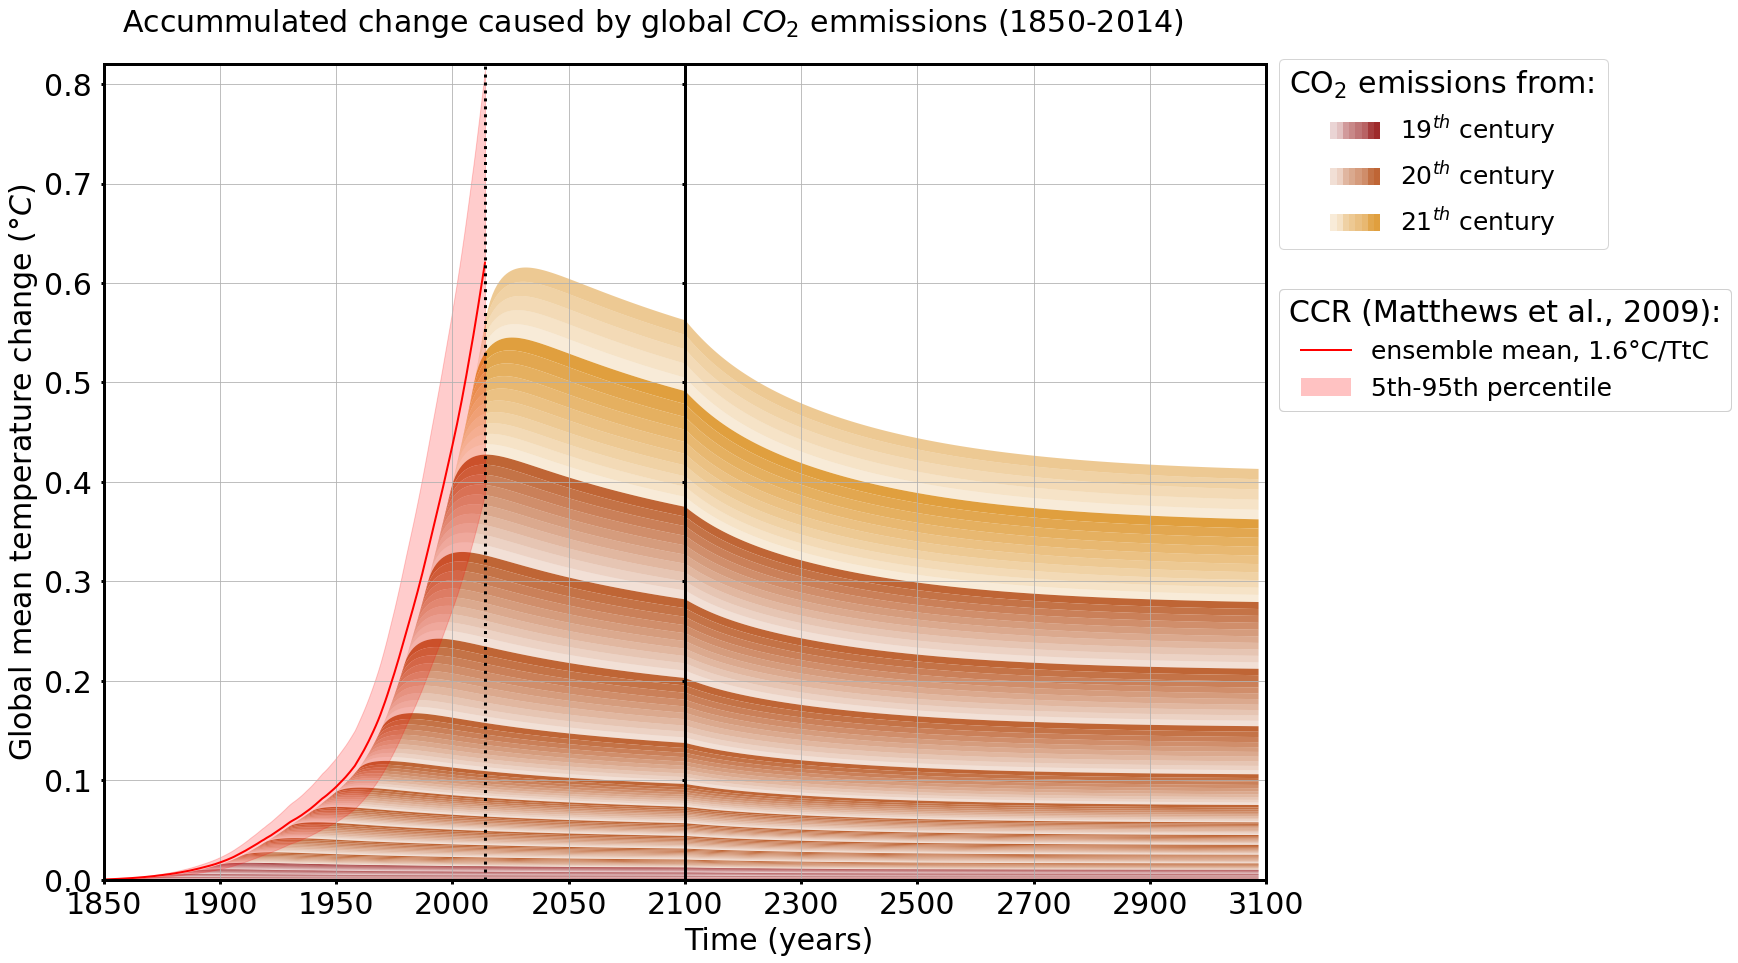

In [83]:
fig = plt.figure(figsize=(25, 15))
grid = plt.GridSpec(1, 12, hspace=0.2, wspace=0)
ax1 = plt.subplot(grid[0, :5])
ax2 = plt.subplot(grid[0, 5:10])

T_diff.loc[:2100,:].plot.area(legend=False, linewidth=0,ax=ax1,cmap=century_cmap)
T_diff.loc[2100:,:].plot.area(legend=False, linewidth=0,ax=ax2,cmap=century_cmap)

ax1.plot(ccr_mean,lw=2,c='r')
ax1.fill_between(ccr_05p.index,ccr_05p.values,ccr_95p.values,color='r',alpha=0.2)

ax1.grid()
ax2.grid()

ax1.set_xlim(1979,2100)
ax2.set_xlim(2100,3000)
ax1.set_ylim(0,0.82)
ax2.set_ylim(0,0.82)

ax2.set_xticks(range(2300,3200,200))
ax2.set_yticklabels([])

ax1.set_xlabel(None)
ax2.set_xlabel(None)

ax1.axvline(2014,linestyle=':',c='k')

ax1.set_ylabel(r'Global mean temperature change ($\degree C$)')
fig.text(0.5, 0.06, 'Time (years)', ha='center')

fig.text(0.135,0.91, r'Accummulated change caused by global $CO_2$ emmissions (1979-2014)')

# legend
cmap_labels = [r'19$^{th}$ century', r'20$^{th}$ century', r'21$^{th}$ century']
cmaps=[color_to_cmap("9E2A2B"),color_to_cmap("BF6535"),color_to_cmap("E09F3E")]
# create proxy artists as handles:
cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
handler_map = dict(zip(cmap_handles, 
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
legend1 = ax2.legend(handles=cmap_handles, 
           labels=cmap_labels, 
           handler_map=handler_map,  loc='center left',bbox_to_anchor=(1, 0.89),
           fontsize=25, title= r'CO$_2$ emissions from: ')
p1 = Line2D([0], [0], color='r', lw=2)
p2 = mpatches.Patch(color='r', alpha=0.2, linewidth=0)
legend2 = ax2.legend([p1,p2], ['ensemble mean, 1.6°C/TtC','5th-95th percentile'], title=r'CCR (Matthews et al., 2009):',fontsize=25,loc='center left',bbox_to_anchor=(1, 0.65))
ax2.add_artist(legend1)
ax2.add_artist(legend2)

plt.savefig(os.path.join('plots','acc_T_global_stamped.png'),dpi=300);

## Plot change in atmospheric CO$_2$ concentration

In [10]:
# each century own color, shading for decadals
l = []
for c in [["546A7B",5],["62929E",10],["C6C5B9",2]]:
    l = l+ [(colors.to_rgba('#'+c[0],i)) for i in np.linspace(0.2,1,10)]*c[1]
# remove last 5 years
l = l[:-5]

co2_cmap=colors.ListedColormap(l)

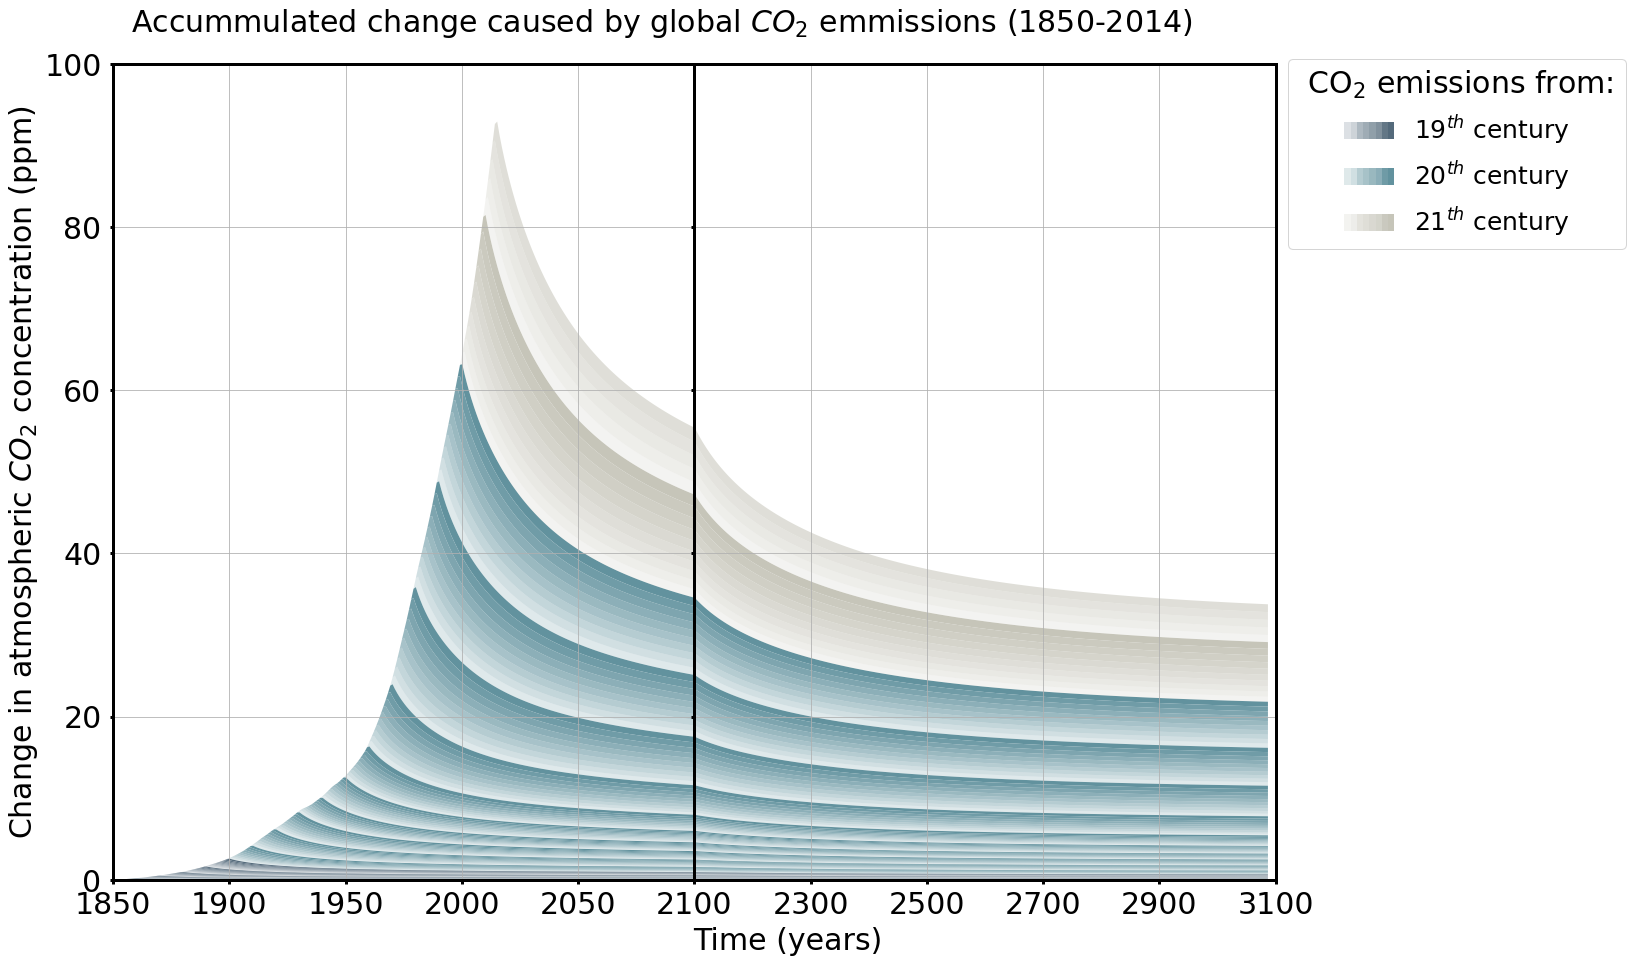

In [10]:
fig = plt.figure(figsize=(25, 15))
grid = plt.GridSpec(1, 12, hspace=0.2, wspace=0)
ax1 = plt.subplot(grid[0, :5])
ax2 = plt.subplot(grid[0, 5:10])

co2_diff.loc[:2100,:].plot.area(legend=False, linewidth=0,ax=ax1,cmap=co2_cmap)
co2_diff.loc[2100:,:].plot.area(legend=False, linewidth=0,ax=ax2,cmap=co2_cmap)

ax1.grid()
ax2.grid()

ax1.set_xlim(1979,2100)
ax2.set_xlim(2100,3000)
ax1.set_ylim(0,100)
ax2.set_ylim(0,100)

ax2.set_xticks(range(2300,3200,200))
ax2.set_yticklabels([])

ax1.set_xlabel(None)
ax2.set_xlabel(None)

ax1.set_ylabel(r'Change in atmospheric $CO_2$ concentration (ppm)')
fig.text(0.5, 0.06, 'Time (years)', ha='center')

fig.text(0.135,0.91, r'Accummulated change caused by global $CO_2$ emmissions (1979-2014)')

# legend
cmap_labels = [r'19$^{th}$ century', r'20$^{th}$ century', r'21$^{th}$ century']
cmaps=[color_to_cmap("546A7B"),color_to_cmap("62929E"),color_to_cmap("C6C5B9")]
# create proxy artists as handles:
cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
handler_map = dict(zip(cmap_handles, 
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
plt.legend(handles=cmap_handles, 
           labels=cmap_labels, 
           handler_map=handler_map,  loc='center left',bbox_to_anchor=(1, 0.89),
           fontsize=25, title= r' CO$_2$ emissions from: ')

plt.savefig(os.path.join('plots','acc_co2_global_stamped.png'),dpi=300);

## Calculate IRF's

### 1. Claculate IRF's

In [7]:
irf_df = pd.DataFrame()
for t in co2_per_yr.loc[:2014].index:
    #print(t,co2_per_yr.loc[t])
    irf = co2_diff.loc[t:t+1000,'yr_'+str(t)]/(co2_per_yr.loc[t]/2.123)
    irf.index = irf.index-t
    irf.iloc[0]=1
    irf_df = irf_df.append(irf)

### 2. Plot 

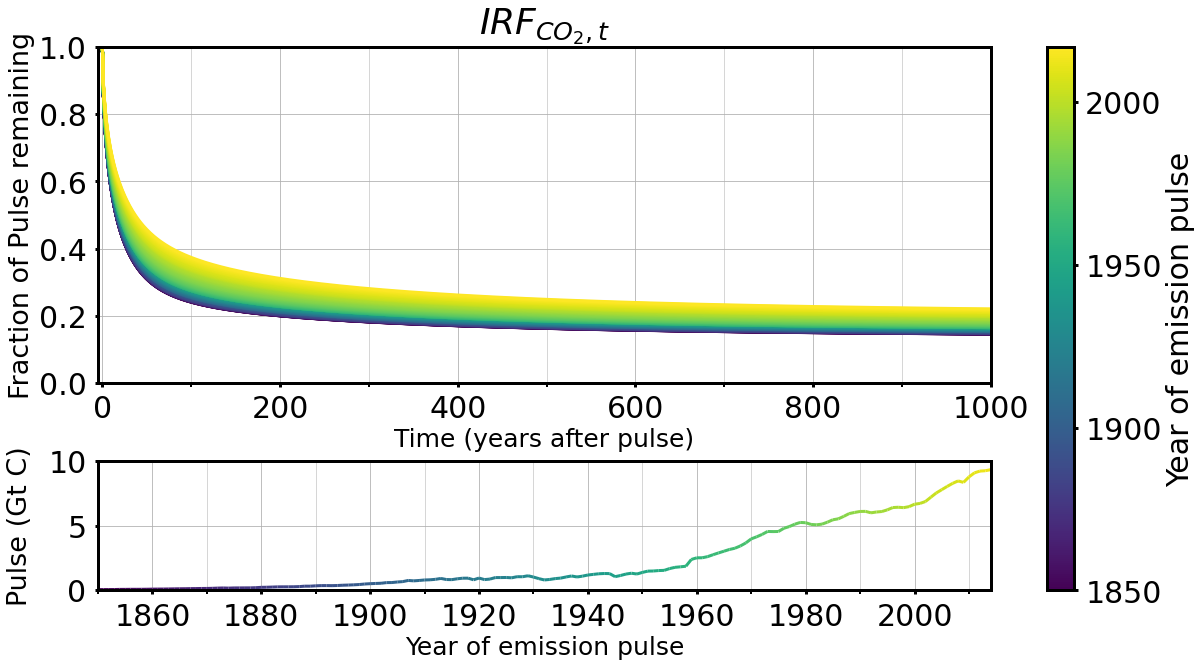

In [8]:

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig = plt.figure(figsize=(25, 15))
grid = plt.GridSpec(6, 10, hspace=3, wspace=0)
ax2 = plt.subplot(grid[:4, :])
ax1 = plt.subplot(grid[4:, :])

x = co2_per_yr.index
y = co2_per_yr.values
dydx = x  # first derivative
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
line = ax1.add_collection(lc,'o')
ax1.set_xlim(1979,2014)
ax1.set_ylim(0,10)
ax1.set_xlabel('Year of emission pulse',size=25)
ax1.set_ylabel('Pulse (Gt C)',size=27,labelpad=15)
ax1.grid()

cbar = fig.colorbar(line, ax=[ax1,ax2])
cbar.set_ticks([1979,1900,1950,2000])
cbar.set_label(r'Year of emission pulse')

irf_df.T.plot.line(cmap=plt.cm.viridis, figsize=(20,10), legend=False,grid=True,ax=ax2)
ax2.set_xlabel('Time (years after pulse)',size=25)
ax2.set_ylabel(r'Fraction of Pulse remaining',size=27)
ax2.set_title(r'$IRF_{CO_2,t}$')
ax2.set_xlim(-5,1000)
ax2.set_ylim(0,1)

ax2.tick_params(which='minor', length=4,width=2)
ax2.xaxis.set_minor_locator(MultipleLocator(100))
ax2.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.5)

ax1.tick_params(which='minor', length=4,width=2)
ax1.xaxis.set_minor_locator(MultipleLocator(10))
ax1.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.5)

plt.savefig(os.path.join('plots','irf_t.png'),dpi=300);

In [13]:
def dT_per_country(iso):
    return T_diff*co2_perc.loc[iso]

def plot_dT_per_country(iso):
    df = dT_per_country(iso)
    
    fig = plt.figure(figsize=(25, 15))
    grid = plt.GridSpec(1, 12, hspace=0.2, wspace=0)
    ax1 = plt.subplot(grid[0, :5])
    ax2 = plt.subplot(grid[0, 5:10])

    df.loc[:2100,:].plot.area(legend=False, linewidth=0,ax=ax1,cmap=century_cmap)
    df.loc[2100:,:].plot.area(legend=False, linewidth=0,ax=ax2,cmap=century_cmap)

    ax1.grid()
    ax2.grid()

    ax1.set_xlim(1979,2100)
    ax2.set_xlim(2100,3000)
    #ax1.set_ylim(0,0.7)
    ax2.set_ylim(ax1.get_ylim())

    ax2.set_xticks(range(2300,3200,200))
    ax2.set_yticklabels([])

    ax1.set_xlabel(None)
    ax2.set_xlabel(None)
    
    ax1.tick_params(axis='both', which='major', pad=15)
    ax2.tick_params(axis='both', which='major', pad=15)

    ax1.set_ylabel(r'Global mean temperature change ($\degree C$)')
    fig.text(0.5, 0.06, 'Time (years)', ha='center')

    title = fig.add_subplot(grid[0,:10])
    title.set_title(r'Accumulated change caused by '+ coco.convert(iso,to='name_short')+', '+iso,pad=15)
    title.set_axis_off()
    
    # legend
    cmap_labels = [r'19$^{th}$ century', r'20$^{th}$ century', r'21$^{th}$ century']
    cmaps=[color_to_cmap("9E2A2B"),color_to_cmap("BF6535"),color_to_cmap("E09F3E")]
    # create proxy artists as handles:
    cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
    handler_map = dict(zip(cmap_handles, 
                           [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
    '''
    plt.legend(handles=cmap_handles, 
               labels=cmap_labels, 
               handler_map=handler_map,  loc='center left',bbox_to_anchor=(1, 0.89),
               fontsize=25, title= r' CO$_2$ emissions from: ')
    '''

    plt.savefig(os.path.join('plots','acc_T_'+iso+'.png'),dpi=300);

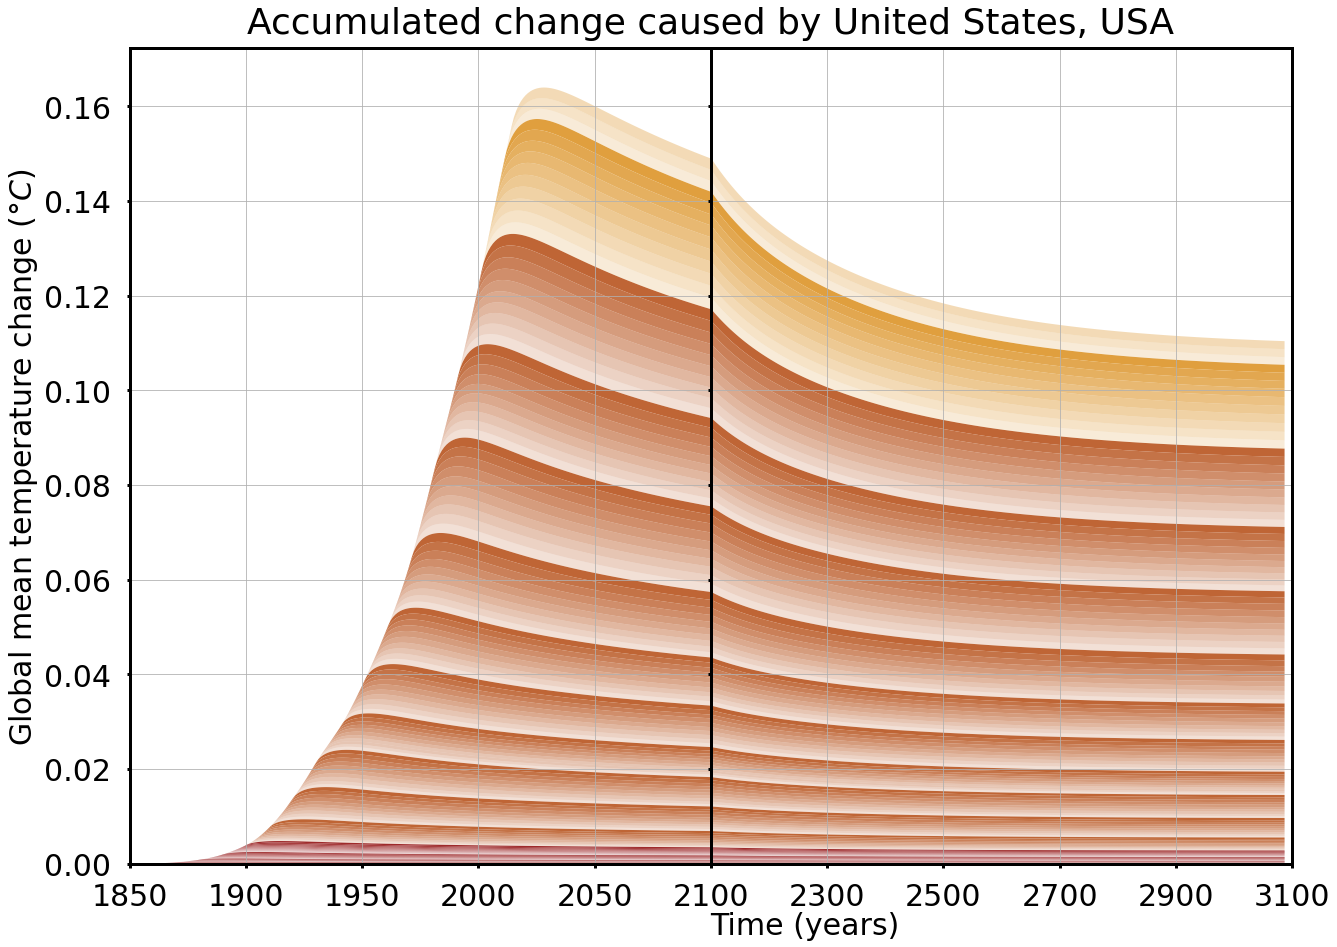

In [61]:
for iso in df.tail(1).index:
    plot_dT_per_country(iso);

In [16]:
df = pd.DataFrame()
for iso in co2_perc.index:
    df = df.append(dT_per_country(iso).sum(axis=1).rename(iso))
df = df.sort_values(by=2016,ascending=True)
df.to_csv('responsibility_countries.csv')

In [19]:
df.to_csv('responsibility_countries.csv',index_label='iso3')

In [51]:
df.loc[:,'continent'] = coco.convert(df.index, to='continent',not_found=None)
df.loc['RKS','continent'] ='Europe'
df.loc['OWID_CZS','continent'] ='Europe'

RKS not found in ISO3
OWID_CZS not found in regex


In [54]:
df.groupby('continent').sum().T.sum()

continent
Africa      14.151667
America    170.927253
Asia       148.213847
Europe     174.352098
Oceania      6.562004
dtype: float64

In [119]:
df_country = df.groupby('continent').sum()
df_country.columns = df_country.columns.astype('int')
df_country = df_country.sort_values(by=2500)
df_country.T.columns.astype('int')

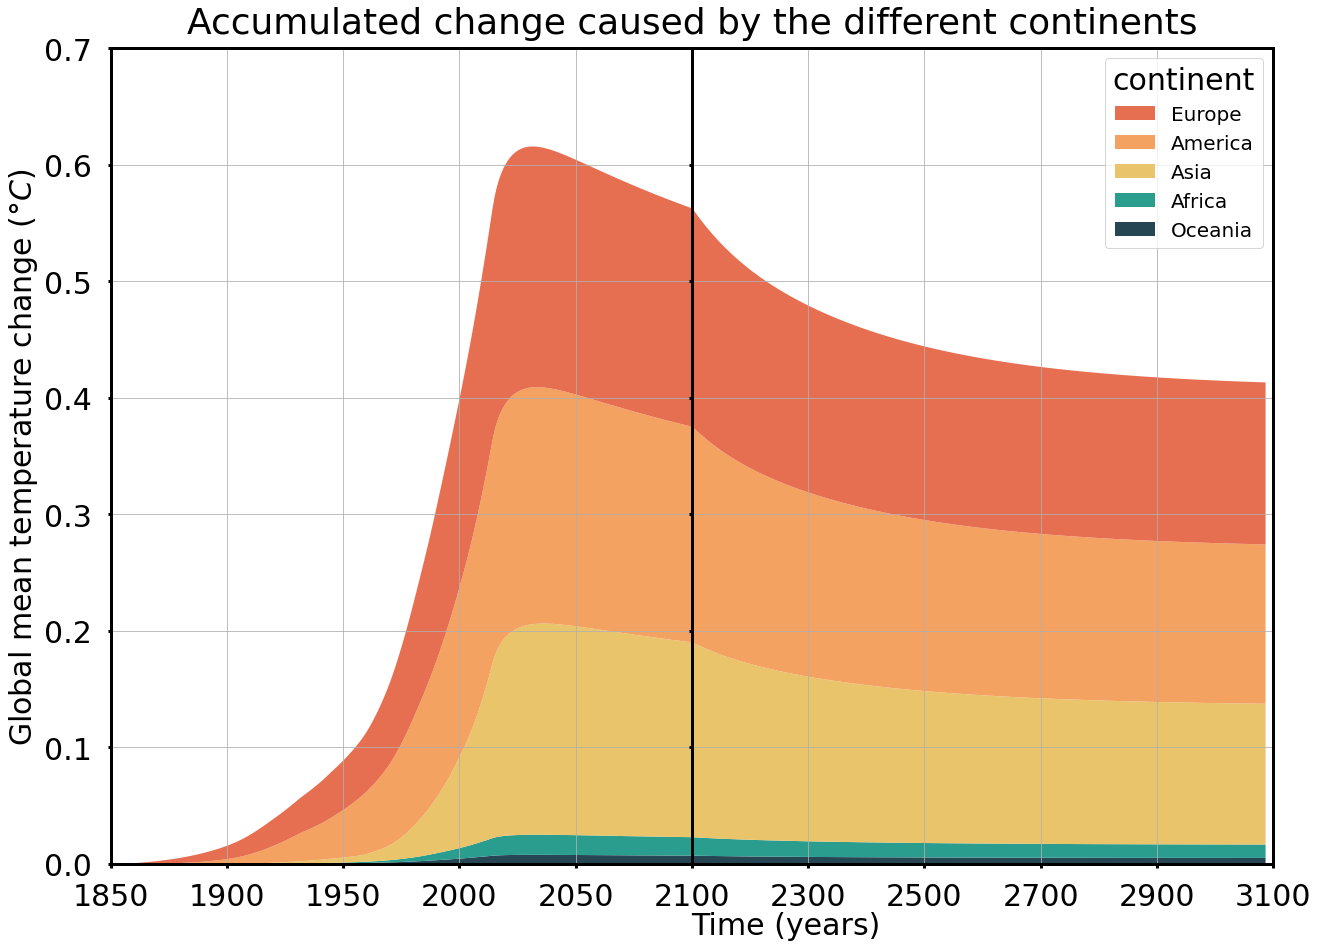

In [152]:
fig = plt.figure(figsize=(25, 15))
grid = plt.GridSpec(1, 12, hspace=0.2, wspace=0)
ax1 = plt.subplot(grid[0, :5])
ax2 = plt.subplot(grid[0, 5:10])

c=('0', '#17A589', '#9C640C', '#ECF0F1','#ECF0F1')
c = ("#264653","#2a9d8f","#e9c46a","#f4a261","#e76f51")
df_country.loc[:,:2100].T.plot.area(legend=False, linewidth=0,ax=ax1,color=c)
df_country.loc[:,2100:].T.plot.area(legend='reverse', linewidth=0,ax=ax2, color=c)

ax1.grid()
ax2.grid()

ax1.set_xlim(1979,2100)
ax2.set_xlim(2100,3000)

ax1.set_ylim(0,0.7)
ax2.set_ylim(ax1.get_ylim())

ax2.set_xticks(range(2300,3200,200))
ax2.set_yticklabels([])

ax1.set_xlabel(None)
ax2.set_xlabel(None)

ax1.tick_params(axis='both', which='major', pad=15)
ax2.tick_params(axis='both', which='major', pad=15)

ax1.set_ylabel(r'Global mean temperature change ($\degree C$)')
fig.text(0.5, 0.06, 'Time (years)', ha='center')

title = fig.add_subplot(grid[0,:10])
title.set_title(r'Accumulated change caused by the different continents',pad=15)
title.set_axis_off()
plt.savefig(os.path.join('plots','acc_T_continents.png'),dpi=300);

### Animation

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
save done


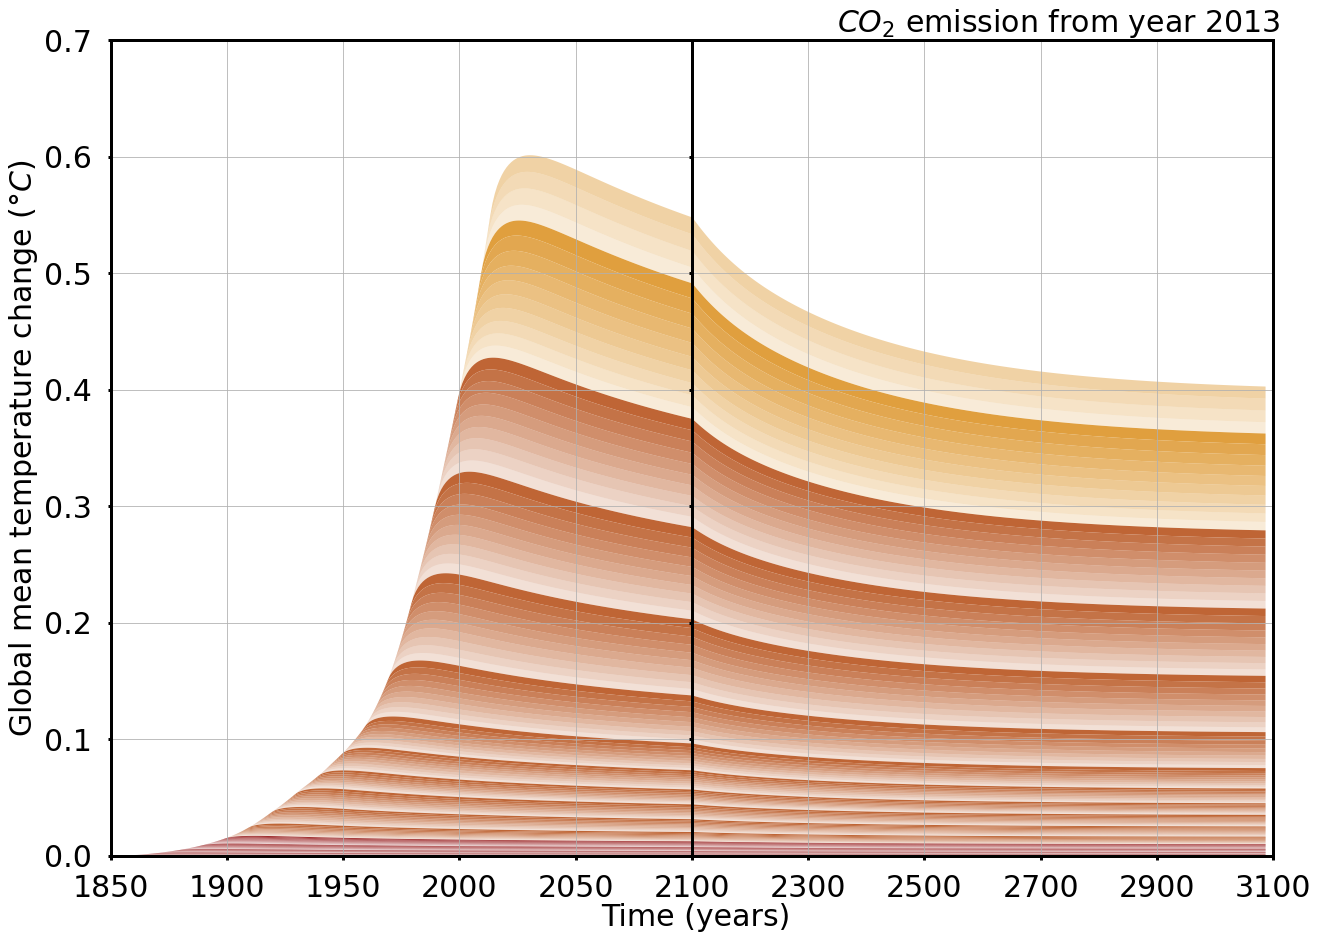

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from celluloid import Camera
from matplotlib import colors


fig = plt.figure(figsize=(25, 15))
grid = plt.GridSpec(1, 12, hspace=0.2, wspace=0)
ax1 = plt.subplot(grid[0, :5])
ax2 = plt.subplot(grid[0, 5:10])
camera = Camera(fig)

for t in range(164):
    print(t)
    cmap = colors.ListedColormap(century_cmap(range(t+1))) 
    T_diff.iloc[:,:t+1].loc[1979:2100].plot.area(legend=False, linewidth=0,ax=ax1,cmap=cmap)
    T_diff.iloc[:,:t+1].loc[2100:].plot.area(legend=False, linewidth=0,ax=ax2,cmap=cmap)
    ax2.text(0.25, 1.01, r'$CO_2$ emission from year '+str(1979+t), transform=ax2.transAxes)  
    camera.snap()
ax1.grid()
ax2.grid()

ax1.set_xlim(1979,2100)
ax2.set_xlim(2100,3000)

ax1.set_ylim(0,0.7)
ax2.set_ylim(ax1.get_ylim())

ax2.set_xticks(range(2300,3200,200))
ax2.set_yticklabels([])

ax1.set_xlabel(None)
ax2.set_xlabel(None)

ax1.tick_params(axis='both', which='major', pad=15)
ax2.tick_params(axis='both', which='major', pad=15)

ax1.set_ylabel(r'Global mean temperature change ($\degree C$)')
fig.text(0.45, 0.06, 'Time (years)', ha='center')


anim = camera.animate(blit=True)
anim.save('T_diff_animation.mp4',dpi=200)
print('save done')
anim

In [5]:
t=249
T_diff.iloc[:,164]
#t_list2=[T_diff.iloc[:,y1].loc[2100:] for y1 in range(t+1)]
#cmap = colors.ListedColormap(century_cmap(range(t+1))) 
#T_diff.iloc[:,:t+1].loc[1979:2100].plot.area(legend=False, linewidth=0,ax=ax1,cmap=cmap)

#time
1696.0    0.000000
1697.0    0.000000
1698.0    0.000000
1699.0    0.000000
1700.0    0.000000
            ...   
3082.0    0.010410
3083.0    0.010409
3084.0    0.010409
3085.0    0.010408
3086.0    0.010408
Name: yr_2014, Length: 1391, dtype: float64

In [113]:
2014-1979

164